In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')
data = pd.DataFrame(dataset.iloc[:,:22])
print(data.STATE)

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = np.array(pd.DataFrame(dataset.iloc[:,22:].values))
Y = Y.reshape(-1)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

0        1
1        1
2        1
3        1
4        1
        ..
44090    2
44091    2
44092    2
44093    2
44094    2
Name: STATE, Length: 44095, dtype: int64
       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  .

In [2]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [4]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
import optuna
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np


In [6]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 300)
    max_depth = trial.suggest_int('max_depth', 1, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)


    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )


    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, Y_train, cv=cv, scoring='accuracy')

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=1)

print("Best Accuracy:", study.best_value)
print("Best Hyperparameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2025-06-04 15:53:04,646] A new study created in memory with name: no-name-96a41751-fa77-4efb-8eb3-6854ac3228d3
[I 2025-06-04 15:53:06,867] Trial 0 finished with value: 0.9235741927293004 and parameters: {'n_estimators': 239, 'max_depth': 33, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': 0.5673923158149082}. Best is trial 0 with value: 0.9235741927293004.
[I 2025-06-04 15:53:07,263] Trial 1 finished with value: 0.9243963087242928 and parameters: {'n_estimators': 18, 'max_depth': 11, 'min_samples_split': 18, 'min_samples_leaf': 13, 'max_features': 0.4892445222711985}. Best is trial 1 with value: 0.9243963087242928.
[I 2025-06-04 15:53:09,572] Trial 2 finished with value: 0.9238293309291589 and parameters: {'n_estimators': 266, 'max_depth': 35, 'min_samples_split': 15, 'min_samples_leaf': 17, 'max_features': 0.7685720355441821}. Best is trial 1 with value: 0.9243963087242928.
[I 2025-06-04 15:53:11,085] Trial 3 finished with value: 0.923602569541873 and parameters: {'

Best Accuracy: 0.9249632262543571
Best Hyperparameters:
  n_estimators: 66
  max_depth: 13
  min_samples_split: 7
  min_samples_leaf: 3
  max_features: 0.18313436298260266


In [8]:
model = RandomForestClassifier(    
    n_estimators = 66, 
    max_depth = 13,
    min_samples_split = 7, 
    min_samples_leaf = 3, 
    max_features = 0.18313436298260266)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=13, max_features=0.18313436298260266,
                       min_samples_leaf=3, min_samples_split=7,
                       n_estimators=66)

In [10]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report

print(classification_report(Y_test,res,digits=6))

[0 1 2 ... 2 2 2]
[0 1 2 ... 2 2 2]
0.9219866197981631
              precision    recall  f1-score   support

           0   0.789638  0.782797  0.786203      1616
           1   0.791568  0.798204  0.794872      1670
           2   1.000000  1.000000  1.000000      5533

    accuracy                       0.921987      8819
   macro avg   0.860402  0.860334  0.860358      8819
weighted avg   0.921984  0.921987  0.921980      8819



PermutationExplainer explainer: 8820it [12:13, 11.87it/s]                          
C:\Users\eddie\AppData\Local\Temp\ipykernel_77108\1552002207.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)


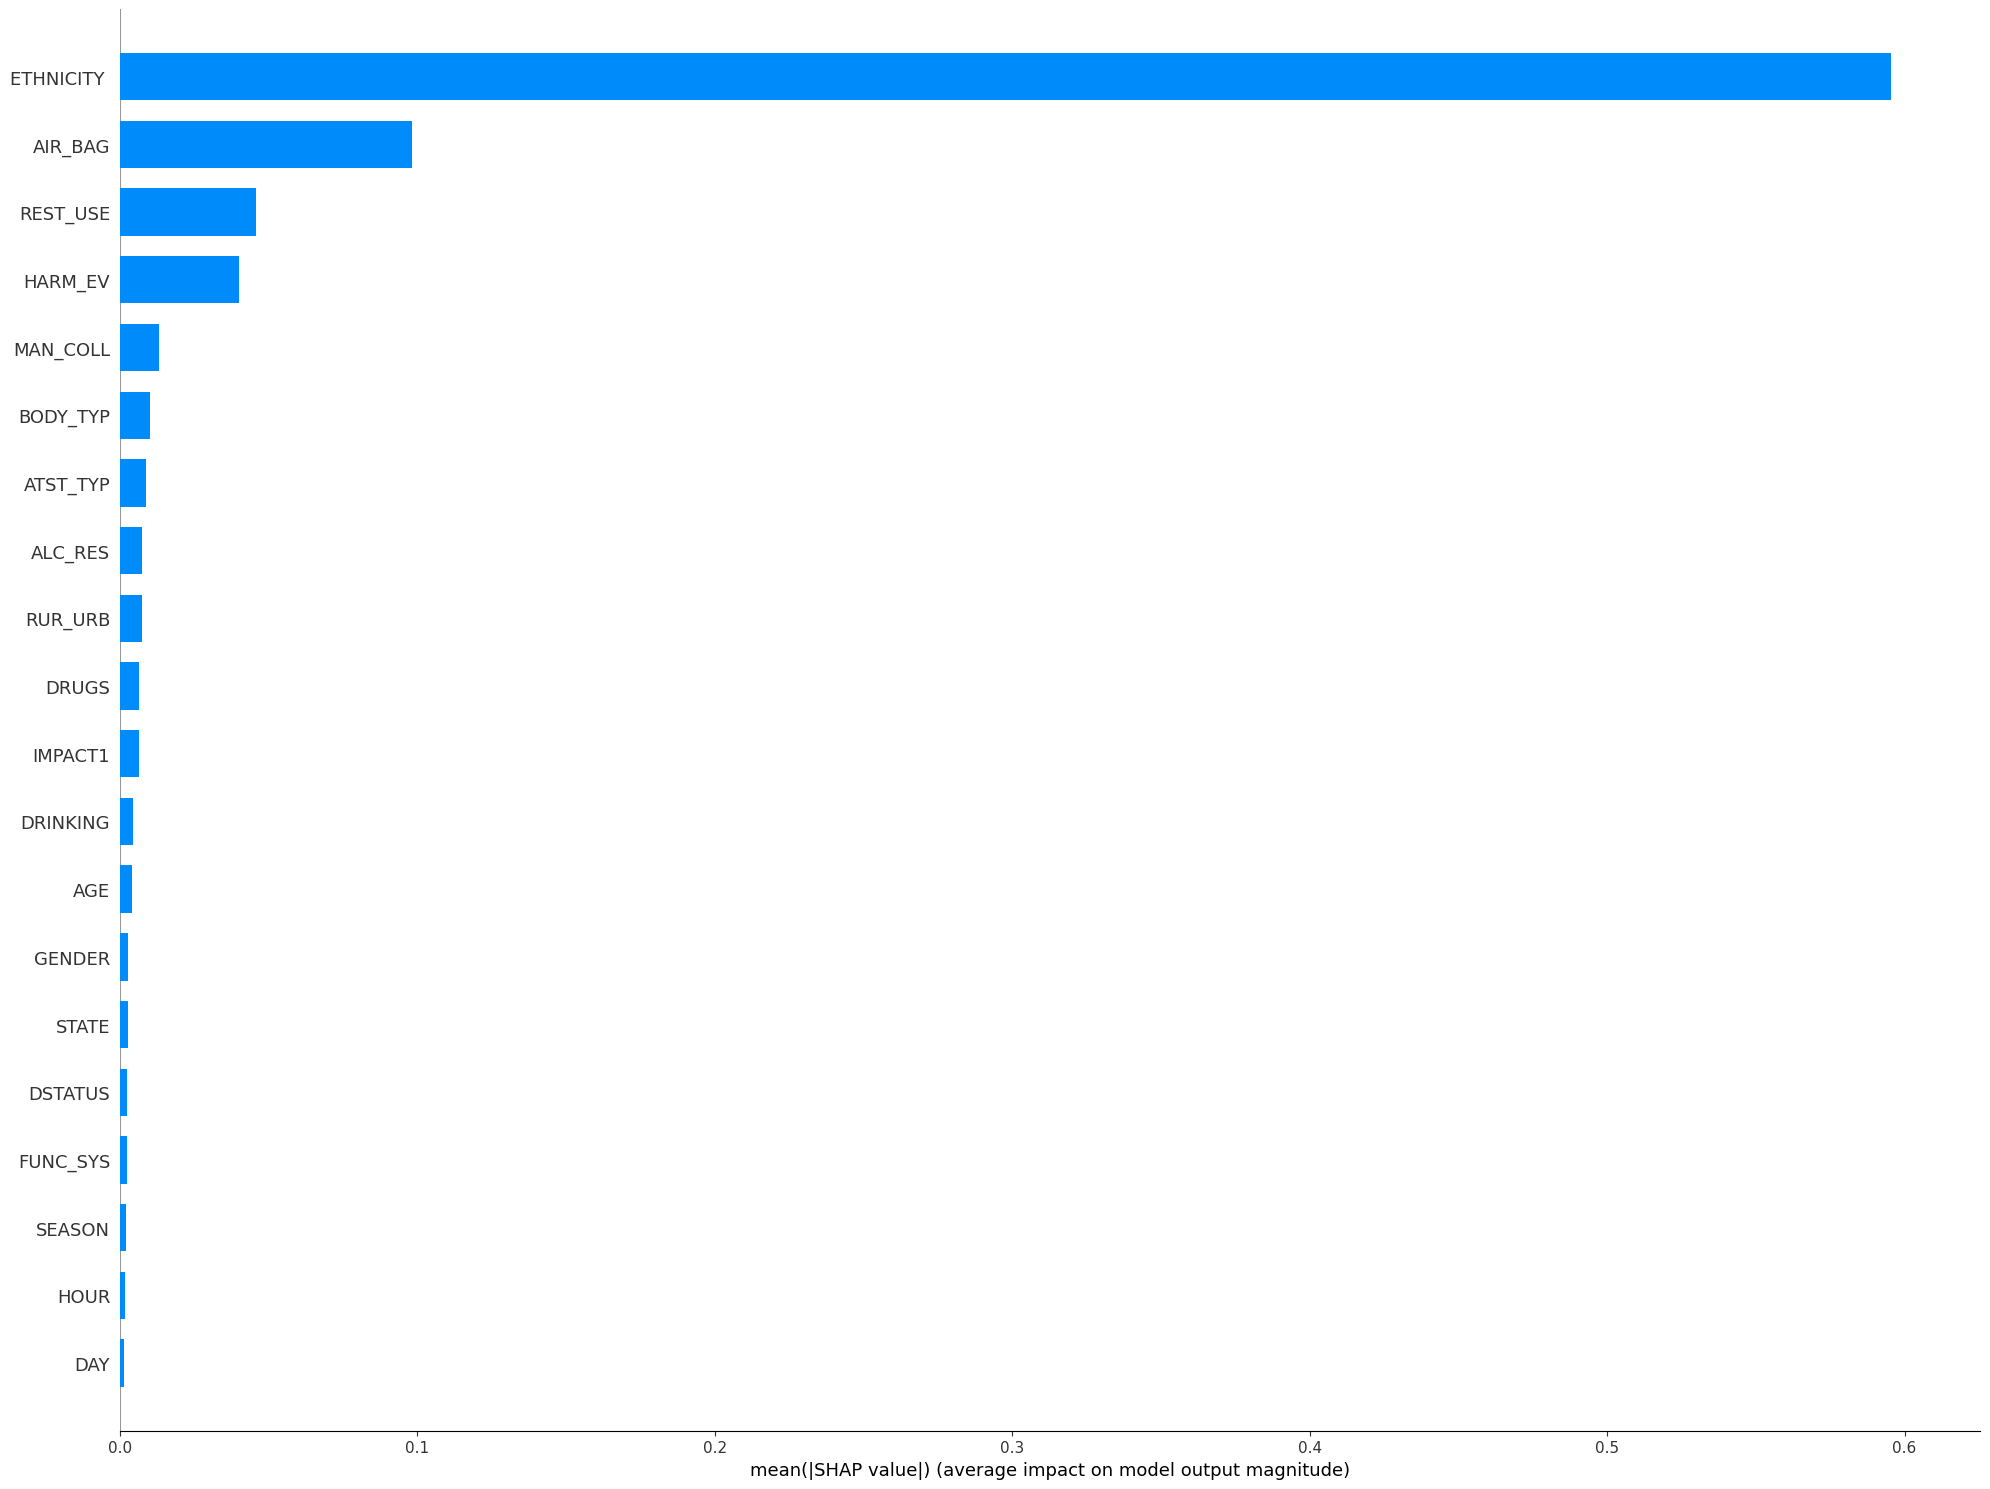

In [13]:
import shap 
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

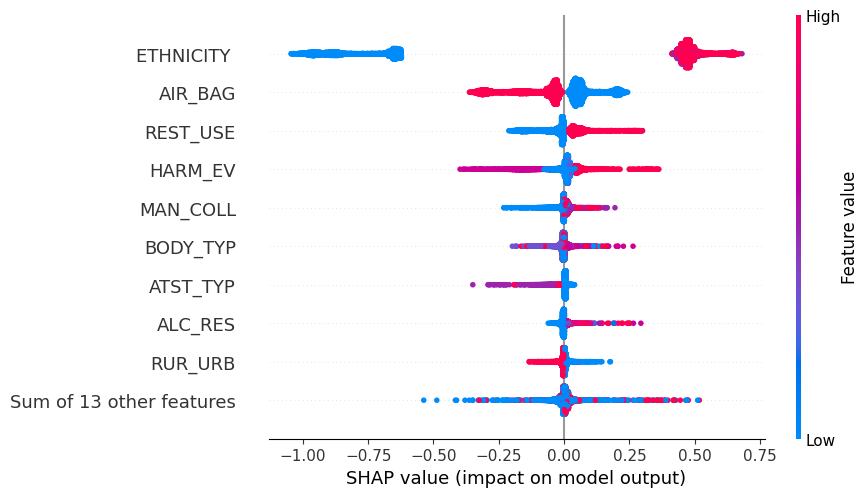

In [14]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

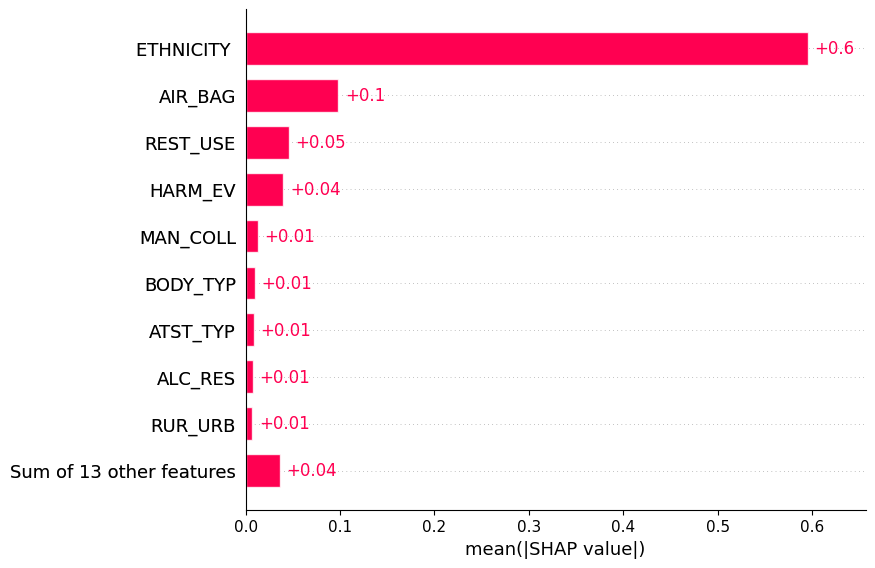

In [15]:
shap.plots.bar(explanation)

In [17]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    shap.plots.waterfall(explanation[i], show=False)
    plt.savefig(os.path.join("shap/rf/waterfall", f"waterfall_{i}.png"), dpi = 300,bbox_inches="tight")
    plt.close()


In [18]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    # shap.plots.waterfall(explanation[i], show=False)
    # shap.initjs()
    shap.force_plot(shap_values[i],feature_names=['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP', 'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ', 'RUR_URB', 'FUNC_SYS', 'IMPACT1'], matplotlib=True, show=False)
    plt.savefig(os.path.join("shap/rf/force/", f"force_{i}.png"), dpi = 300,bbox_inches="tight")
    # shap.save_html(os.path.join("shap/adaboost/force/", f"force_{i}.png"), force_plot)
    plt.close()


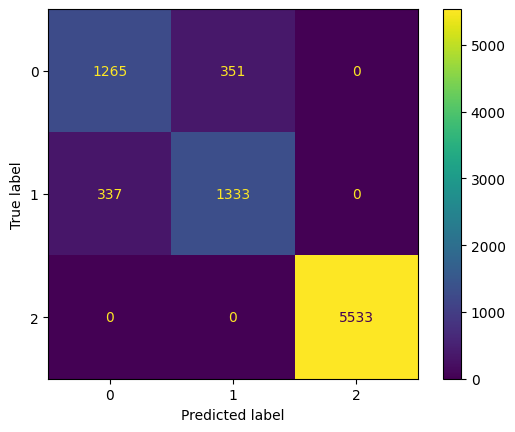

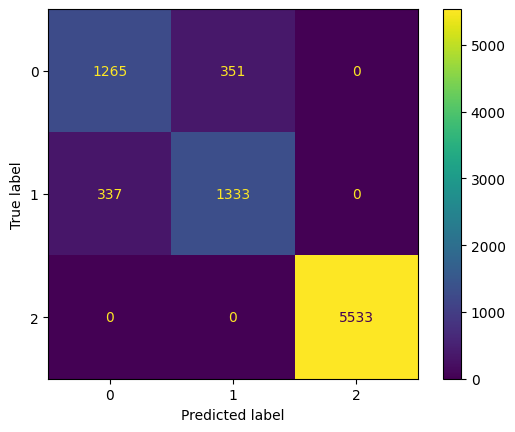

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()
plt.show()